# Neural Networks
This notebook runs multiple different neural networks.

<br><br><br><br>
# Libaries & Global variables

## Libaries

In [39]:
# General libaries
import os, shutil
import pandas as pd
import numpy as np
import pickle

pd.set_option('max_colwidth', -1)
pd.set_option("display.max_rows", 100)

C:\Users\Paulo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


## Global variables

In [40]:
dataset_path = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure')

In [41]:
training_path   = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure', 'training')
validation_path = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure', 'validation')
test_path       = os.path.join(os.getcwd(), 'datasets', 'UTKface-new-structure', 'test')

<br><br><br><br>
# General functions

In [88]:
def load_dataset():
    """
    This function loads the dataset.
    """
    with open('df.pkl', 'rb') as input_file:
        df = pickle.load(input_file)
        
    return df


def save_history_model(history, filename, storage_location):
    """
    This function pickles the history of a model and stores it
    at the storage_location with the given filename.
    """
    
    # Pickle the result
    location = os.path.join(storage_location, filename + '.pkl')
    
    with open(location, 'wb') as output_file:
        pickle.dump(history, output_file)
        
def plot_history(history, x_as, y_as, title, line1='accuracy', line2='val_accuracy'):
    """
    This function plots two lines, which as default are accuracy
    and val_accuracy.
    """
    
    history = history.history
    
    plt.plot(range(1, len(history[line1]) + 1), history[line1])
    plt.plot(range(1, len(history[line2]) + 1), history[line2])
    plt.xlabel(x_as)
    plt.ylabel(y_as)
    plt.title(title)
    plt.legend([line1, line2])
    plt.show()

In [43]:
df = load_dataset()
df.head()

,age,age-binned,gender,race,datetime,category,path
4,10,"(0, 10]",0,0,20161220222308131,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10
5,10,"(0, 10]",0,0,20170103200329407,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10
6,10,"(0, 10]",0,0,20170103200522151,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10
7,10,"(0, 10]",0,0,20170103233459275,validation,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\validation\10
8,10,"(0, 10]",0,0,20170104013211746,training,C:\Users\Paulo\Documents\GitHub\deep-learning-age-estimation\notebooks\datasets\UTKface-new-structure\training\10


<br><br><br><br><br><br><br><br>
# Neural Network 1 - LeNet-5 CNN Architecture
* Sithungu, S., & Van der Haar, D. (2019). Real-Time Age Detection Using a Convolutional Neural Network. *Business Information Systems*, 245–256. https://doi.org/10.1007/978-3-030-20482-2_20
* Information of LeNet-5 CNN architecture https://engmrk.com/lenet-5-a-classic-cnn-architecture/


<br>

The LetNet-5 structure consists of:
* Layer 1 - Input: 32x32 grayscale image with 6 feature maps of size 5x5 and stride 1.
* Layer 2 - Average pooling with filter size 2x2 and stride 2.
* Layer 3 - Conv layer with 16 feature maps of size 5x5 and stride 1.
* Layer 4 - Average pooling with filter size 2x2 and stride 2.
* Layer 5 - Fully connected layer with 120 units/feature maps of size 1x1.
* Layer 6 - Fully connected layer with 84 units.

<br><br>
## Libaries

In [64]:
# General libaries
import pandas as pd
import numpy as np
import os

# Neural network related
import keras
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import layers
from keras.preprocessing.image import ImageDataGenerator # To create an image generator to create batches of images
from keras.preprocessing import image # To change images to an np array AND visualize the image
from keras import optimizers # to optimize

# Visualizing
import matplotlib.pyplot as plt

# To clear ram
from tensorflow.keras import backend as K
K.clear_session()

# To get information about ram
import multiprocessing

<br><br>
## Functions

In [66]:
def build_dense_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (3,3), 
                            activation  = 'relu', 
                            input_shape = (32, 32, 1)))
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.AveragePooling2D(pool_size = (2,2), 
                                      strides   = 1))    
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dense(units = 84, 
                           activation='relu'))
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='relu'))
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

model = build_dense_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_3 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
average_pooling2d_4 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               1298040   
_________________________________________________________________
dense_5 (Dense)              (None, 84)               

<br><br>
## Generator

In [67]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (32, 32)
COLOR_MODE  = 'grayscale'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE)

Found 15990 images belonging to 7 classes.
Found 4584 images belonging to 7 classes.
Found 2263 images belonging to 7 classes.


<br><br><br>
## Run the model

In [70]:
K.clear_session()

model = build_dense_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_1 (Average (None, 29, 29, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        880       
_________________________________________________________________
average_pooling2d_2 (Average (None, 26, 26, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               1298040   
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [73]:
history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 50,
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = (multiprocessing.cpu_count() - 1),
                              use_multiprocessing = False  # Not sure why it should be false, gives an error when true.
                             )

Epoch 1/50
499/499 [==============================] - 165s 330ms/step - loss: 2.3260 - accuracy: 0.3957 - val_loss: 1.9550 - val_accuracy: 0.3955
Epoch 2/50
499/499 [==============================] - 174s 349ms/step - loss: 2.3154 - accuracy: 0.4068 - val_loss: 3.2188 - val_accuracy: 0.3897
Epoch 3/50
499/499 [==============================] - 163s 328ms/step - loss: 2.2919 - accuracy: 0.4064 - val_loss: 1.5205 - val_accuracy: 0.3963
Epoch 4/50
499/499 [==============================] - 163s 326ms/step - loss: 2.3084 - accuracy: 0.4120 - val_loss: 3.3265 - val_accuracy: 0.3917
Epoch 5/50
499/499 [==============================] - 163s 326ms/step - loss: 2.3067 - accuracy: 0.4126 - val_loss: 2.1838 - val_accuracy: 0.3970
Epoch 6/50
499/499 [==============================] - 165s 330ms/step - loss: 2.3351 - accuracy: 0.4172 - val_loss: 2.9081 - val_accuracy: 0.3981
Epoch 7/50
499/499 [==============================] - 163s 327ms/step - loss: 2.2895 - accuracy: 0.4178 - val_loss: 2.5914 -

<br><br><br>
## Save results and plot results

In [90]:
# Save results
model.save_weights('models-and-results/lenet-5-1.0-weights.h5')
model.save('models-and-results/lenet-5-1.0-model.h5')
save_history_model(history          = history,
                   filename         = 'lenet-5-1.0-history', 
                   storage_location = 'models-and-results')

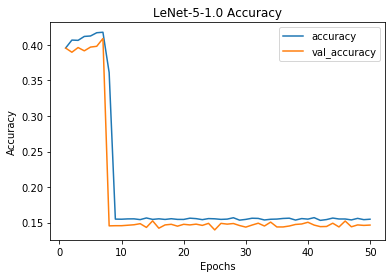

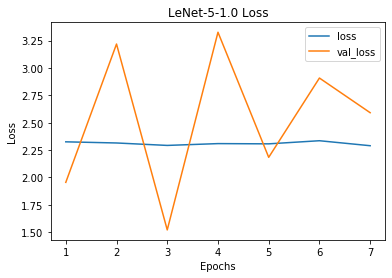

In [91]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'LeNet-5-1.0 Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'LeNet-5-1.0 Loss')

------

<br><br><br><br>
# Neural Network 2 - LeNet-5 CNN (proposed improved version)

<br><br>
## Libaries

In [104]:
# General libaries
import pandas as pd
import numpy as np
import os

# Neural network related
import keras
from keras import models
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import layers
from keras.preprocessing.image import ImageDataGenerator # To create an image generator to create batches of images
from keras.preprocessing import image # To change images to an np array AND visualize the image
from keras import optimizers # to optimize

# Visualizing
import matplotlib.pyplot as plt

# To clear ram
from tensorflow.keras import backend as K
K.clear_session()

# To get information about ram
import multiprocessing

<br><br>
## Functions

In [105]:
def build_model():
    """
    This function creates a simple sequential neural network.
    """
    # Sequential model
    model = models.Sequential() 
    
    # Hidden layers
    model.add(layers.Conv2D(filters     = 6, 
                            kernel_size = (7, 7),        # Fiters from (3, 3) to (7, 7)
                            activation  = 'relu', 
                            input_shape = (200, 200, 3)))
    model.add(layers.MaxPooling2D(pool_size = (2,2), 
                                      strides   = 2))     # Assumed based on trial and error, not mentioned in the paper
    
    model.add(layers.Conv2D(filters     = 16, 
                            kernel_size = (3,3), 
                            activation  = 'relu'))
    model.add(layers.MaxPooling2D(pool_size = (2,2), 
                                      strides   = 2))     # Assumed based on trial and error, not mentioned in the paper
    
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(units = 120, 
                           activation='relu'))
    model.add(layers.Dropout(rate = 0.5))                # Dropout layer added
    
    # Output layer
    model.add(layers.Dense(units = 7, 
                           activation='softmax'))        # Softmax instead of relu
    
    # Compiler
    model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])      
        
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 194, 194, 6)       888       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 35344)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4241400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)              

<br><br>
## Generator

In [106]:
# Define image generators objects
train_datagen      = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen       = ImageDataGenerator(rescale=1./255)

# Create image generators
TARGET_SIZE = (200, 200)
COLOR_MODE  = 'rgb'
BATCH_SIZE  = 32

train_generator    = train_datagen.flow_from_directory(directory   = training_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

validation_datagen = train_datagen.flow_from_directory(directory   = validation_path,
                                                       target_size = TARGET_SIZE,
                                                       color_mode  = COLOR_MODE,
                                                       batch_size  = BATCH_SIZE)

test_generator     = test_datagen.flow_from_directory(directory    = test_path,
                                                      target_size  = TARGET_SIZE,
                                                      color_mode   = COLOR_MODE,
                                                      batch_size   = BATCH_SIZE)

Found 15990 images belonging to 7 classes.
Found 4584 images belonging to 7 classes.
Found 2263 images belonging to 7 classes.


<br><br><br>
## Run the model

In [108]:
K.clear_session()

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 194, 194, 6)       888       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 35344)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               4241400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)              

In [109]:
history = model.fit_generator(generator           = train_generator,
                              steps_per_epoch     = train_generator.n // train_generator.batch_size,
                              epochs              = 40,    # Paper stated that it converged after 20/100 epochs
                              validation_data     = validation_datagen,
                              validation_steps    = validation_datagen.n // validation_datagen.batch_size,
                              verbose             = 1,
                              workers             = (multiprocessing.cpu_count() - 1),
                              use_multiprocessing = False  # Not sure why it should be false, gives an error when true.
                             )

Epoch 1/40
499/499 [==============================] - 756s 2s/step - loss: 1.7781 - accuracy: 0.3554 - val_loss: 1.8286 - val_accuracy: 0.3923
Epoch 2/40
499/499 [==============================] - 871s 2s/step - loss: 1.6370 - accuracy: 0.3969 - val_loss: 1.6635 - val_accuracy: 0.3972
Epoch 3/40
499/499 [==============================] - 869s 2s/step - loss: 1.5613 - accuracy: 0.4259 - val_loss: 1.5515 - val_accuracy: 0.3864
Epoch 4/40
499/499 [==============================] - 702s 1s/step - loss: 1.4917 - accuracy: 0.4451 - val_loss: 1.4408 - val_accuracy: 0.3941
Epoch 5/40
499/499 [==============================] - 715s 1s/step - loss: 1.4064 - accuracy: 0.4840 - val_loss: 1.5658 - val_accuracy: 0.3886
Epoch 6/40
499/499 [==============================] - 693s 1s/step - loss: 1.2981 - accuracy: 0.5268 - val_loss: 2.0111 - val_accuracy: 0.3787
Epoch 7/40
499/499 [==============================] - 701s 1s/step - loss: 1.2003 - accuracy: 0.5662 - val_loss: 1.4343 - val_accuracy: 0.3594

<br><br><br>
## Save results and plot results

In [110]:
# Save results
model.save_weights('models-and-results/lenet-5-proposed-model-1.0-weights.h5')
model.save('models-and-results/lenet-5-proposed-model-1.0-model.h5')
save_history_model(history          = history,
                   filename         = 'lenet-5-proposed-model-1.0-model', 
                   storage_location = 'models-and-results')

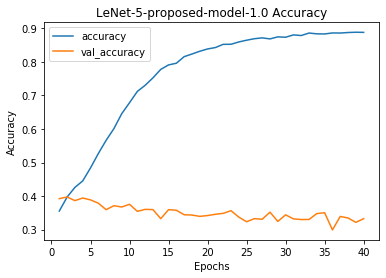

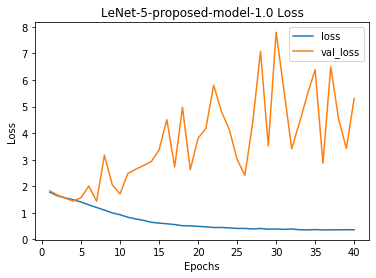

In [111]:
# Plot history
plot_history(history, line1='accuracy', line2='val_accuracy',
             x_as = 'Epochs', y_as = 'Accuracy', title = 'LeNet-5-proposed-model-1.0 Accuracy')

plot_history(history, line1='loss', line2='val_loss',
             x_as = 'Epochs', y_as = 'Loss', title = 'LeNet-5-proposed-model-1.0 Loss')